In [120]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans




In [121]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import dendrogram, linkage
from statsmodels.graphics.mosaicplot import mosaic

In [227]:
# Step 1: Collecting Data
# Loading data from a CSV file
file_path = 'mcdonalds.csv'  # replace with your file path
data = pd.read_csv(file_path)
# Display the first few rows of the dataset
print(data.head())

  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   
3   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes        No      No   
4    No        Yes    No       Yes    Yes  Yes   Yes    No        No     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  
3        Yes   +4   69         Once a week  Female  
4         No   +2   49        Once a month    Male  


In [123]:
# Print the dimensions of the dataset
print(data.shape)

(1453, 15)


In [124]:
print(data.columns)

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')


In [125]:
#step 02 : data cleaning
# Check for missing values
print(data.isnull().sum())


yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64


In [126]:
# Fill or drop missing values as appropriate
data = data.fillna(method='ffill')

In [127]:
# Check for duplicates
print(data.duplicated().sum())

22


In [128]:
# Remove duplicates
data = data.drop_duplicates()


In [129]:
# Display the cleaned data
print(data.head())

  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   
3   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes        No      No   
4    No        Yes    No       Yes    Yes  Yes   Yes    No        No     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  
3        Yes   +4   69         Once a week  Female  
4         No   +2   49        Once a month    Male  


In [130]:
# Convert the first 11 columns to a matrix
MData_x = data.iloc[:, 0:11].to_numpy()

In [131]:
# Convert "Yes" values to 1 and "No" values to 0
MData_x = (MData_x == "Yes") + 0

In [132]:
# Calculate the column means and round to 2 decimal places
col_means = np.round(np.mean(MData_x, axis=0), 2)

print(col_means)

[0.55 0.91 0.1  0.87 0.53 0.9  0.6  0.64 0.36 0.2  0.24]


In [133]:
# Step 3: Exploratory Data Analysis (EDA)

print(data.describe())

               Age
count  1431.000000
mean     44.656184
std      14.199400
min      18.000000
25%      33.000000
50%      45.000000
75%      57.000000
max      71.000000


In [134]:
# Convert the first 11 columns to a matrix
Data_x = data.iloc[:, 0:11].to_numpy()

In [135]:
# Convert "Yes" values to 1 and "No" values to 0
Data_x = (Data_x == "Yes") + 0

In [136]:
# Calculate the column means and round to 2 decimal places
col_means = np.round(np.mean(Data_x, axis=0), 2)

print(col_means)

[0.55 0.91 0.1  0.87 0.53 0.9  0.6  0.64 0.36 0.2  0.24]


In [137]:
# Fit PCA to the data
Data_pca = PCA().fit(Data_x)

# Print the summary of the PCA results
print("PCA Summary:")
print("-------------")
print("Proportion of variance explained by each PC:")
print(Data_pca.explained_variance_ratio_)
print("\nCumulative proportion of variance explained:")
print(np.cumsum(Data_pca.explained_variance_ratio_))

PCA Summary:
-------------
Proportion of variance explained by each PC:
[0.29899056 0.19156392 0.13267983 0.08290307 0.05969759 0.05069322
 0.04429957 0.03985029 0.03715547 0.03260161 0.02956487]

Cumulative proportion of variance explained:
[0.29899056 0.49055448 0.62323431 0.70613738 0.76583497 0.81652819
 0.86082776 0.90067805 0.93783352 0.97043513 1.        ]


In [138]:
# The standard deviations of the principal components
print("Standard deviations (1, .., p=11):")
print(np.round(Data_pca.explained_variance_ ** 0.5, 1))

Standard deviations (1, .., p=11):
[0.8 0.6 0.5 0.4 0.3 0.3 0.3 0.3 0.3 0.3 0.2]


In [139]:
# The shape of the rotation matrix
rotation = Data_pca.components_
print("Rotation (n x k) = (11 x 11):")
print(rotation.shape)

Rotation (n x k) = (11 x 11):
(11, 11)


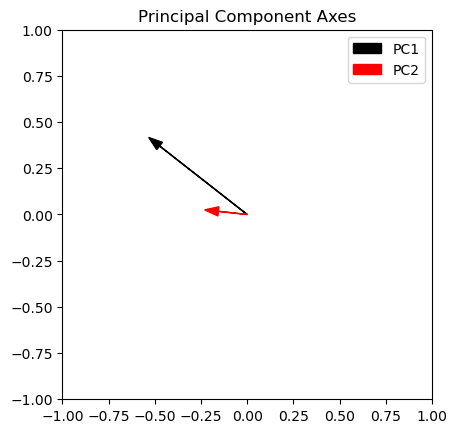

In [140]:
# Plot the projection axes of the first two principal components
fig, ax = plt.subplots()

ax.arrow(0, 0, Data_pca.components_[0, 0], Data_pca.components_[1, 0], head_width=0.05, color='k', label='PC1')
ax.arrow(0, 0, Data_pca.components_[0, 1], Data_pca.components_[1, 1], head_width=0.05, color='r', label='PC2')

ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_aspect('equal')

ax.legend()
ax.set_title('Principal Component Axes')
plt.show()

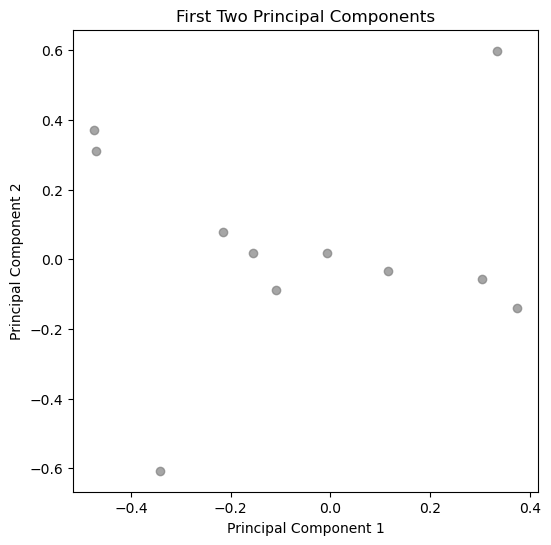

In [141]:
# Plot the first two principal components
plt.figure(figsize=(6, 6))
plt.scatter(Data_pca.components_[0], Data_pca.components_[1], c='grey', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('First Two Principal Components')
plt.show()

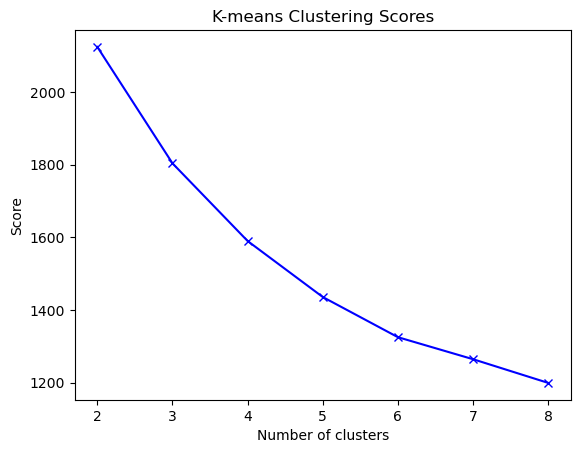

In [154]:


# Set random seed for reproducibility
np.random.seed(1234)

# Define the range of k values
k_range = [2, 3, 4, 5, 6, 7, 8]

# Perform k-means clustering
inertia_values = [KMeans(n_clusters=k, random_state=1234, n_init=10).fit(Data_x).inertia_ for k in k_range]

# Plot the k-means clustering results
plt.plot(k_range, inertia_values, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Score')
plt.title('K-means Clustering Scores')
plt.show()

In [155]:

# relabel the clusters
best_k = 3  #elbow point number 
kmeans = KMeans(n_clusters=best_k, random_state=1234, n_init=10)
kmeans.fit(Data_x)
cluster_assignment = kmeans.labels_

print("Cluster labels:", cluster_assignment)

Cluster labels: [1 2 2 ... 2 0 1]


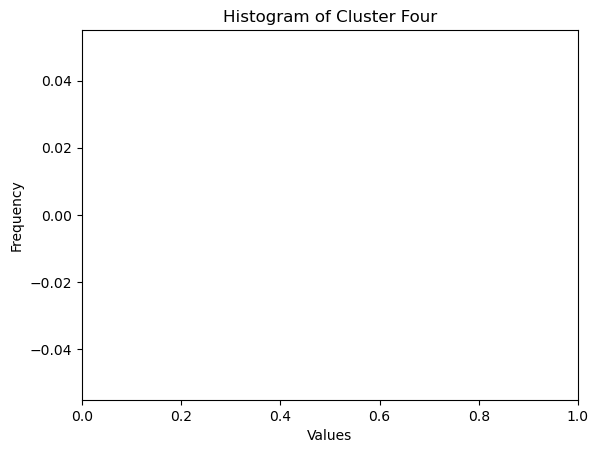

In [179]:
# extract the points assigned to the fourth cluster
cluster_four = Data_x[cluster_assignment == 3]

# plot the histogram
plt.hist(cluster_four, range=[0,1])
plt.xlim(0,1)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Cluster Four')
plt.show()

In [162]:
cluster_assignment_k4 = cluster_assignment[3]

In [145]:
from sklearn.cluster import KMeans

# Apply k-means clustering with k=4
cluster_model_k4 = KMeans(n_clusters=4, random_state=42, n_init=10)
cluster_model_k4.fit(Data_x)

# Extract the cluster four points
cluster_four_points = Data_x[cluster_model_k4.labels_ == 3]

In [146]:
from sklearn.cluster import AgglomerativeClustering

#Applying single linkage clustering on the points in the fourth cluster
single_linkage_clustering = AgglomerativeClustering(n_clusters=None, linkage='single', distance_threshold=0)
result_fourth_cluster = single_linkage_clustering.fit_predict(cluster_four_points)

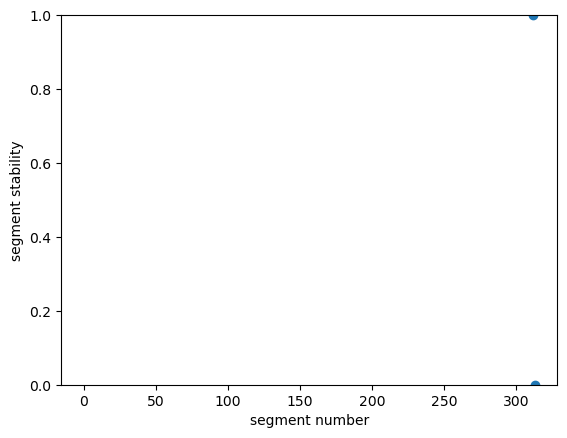

In [147]:
import matplotlib.pyplot as plt

# Plot the results of the single linkage clustering on the points in the fourth cluster
plt.plot(result_fourth_cluster, 'o')
plt.ylim([0, 1])
plt.xlabel('segment number')
plt.ylabel('segment stability')
plt.show()

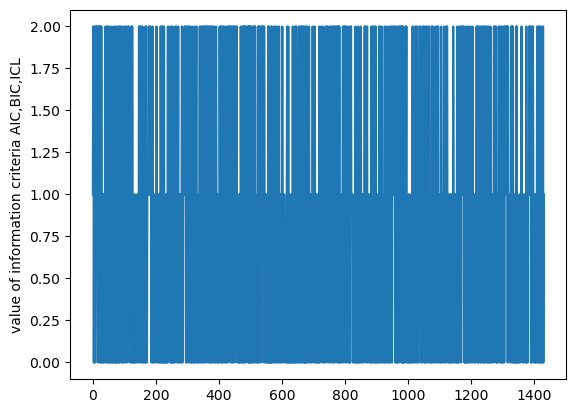

In [174]:
plt.plot(cluster_assignment)
plt.ylabel('value of information criteria AIC,BIC,ICL')
plt.show()

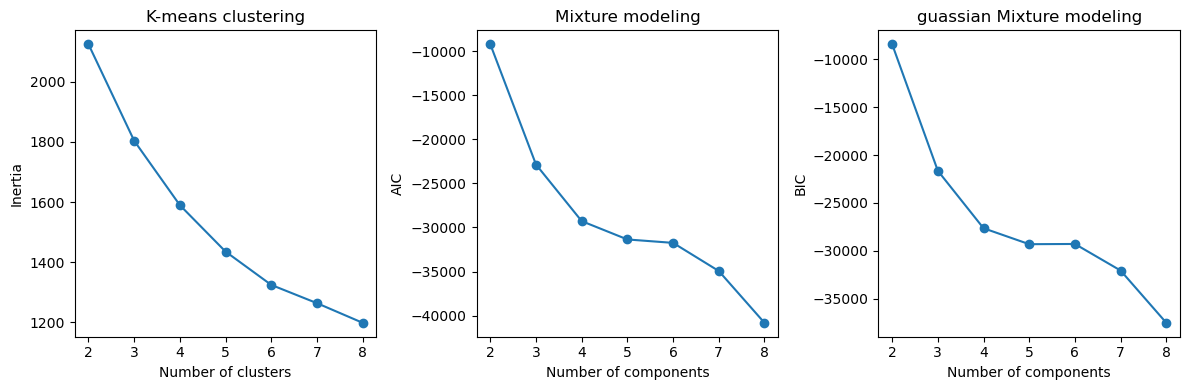

In [151]:
# Plot AIC, BIC, and inertia
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12,4))
ax[0].plot(k_range, k_inertias, '-o')
ax[0].set_xlabel('Number of clusters')
ax[0].set_ylabel('Inertia')
ax[0].set_title('K-means clustering')
ax[1].plot(m_range, m_aics, '-o')
ax[1].set_xlabel('Number of components')
ax[1].set_ylabel('AIC')
ax[1].set_title('Mixture modeling')
ax[2].plot(m_range, m_bics, '-o')
ax[2].set_xlabel('Number of components')
ax[2].set_ylabel('BIC')
ax[2].set_title('guassian Mixture modeling')
plt.tight_layout()
plt.show()

In [195]:
from sklearn.mixture import GaussianMixture
import numpy as np
import pandas as pd

# ... (rest of the code remains the same)

# Create a GaussianMixture object with 2 components (i.e., 2 clusters)
gm = GaussianMixture(n_components=2, tol=1e-3, max_iter=100)

# Fit the mixture model to the binary data
gm.fit(binary_data)

# Calculate AIC and BIC values
aic_value = gm.aic(binary_data)
bic_value = gm.bic(binary_data)

# Calculate ICL value
n_samples = binary_data.shape[0]
icl_value = bic_value - np.log(n_samples) * gm.n_components

print("AIC:", aic_value)
print("BIC:", bic_value)
print("ICL:", icl_value)

AIC: -165077.52240845942
BIC: -162175.88545092382
ICL: -162190.41770848294


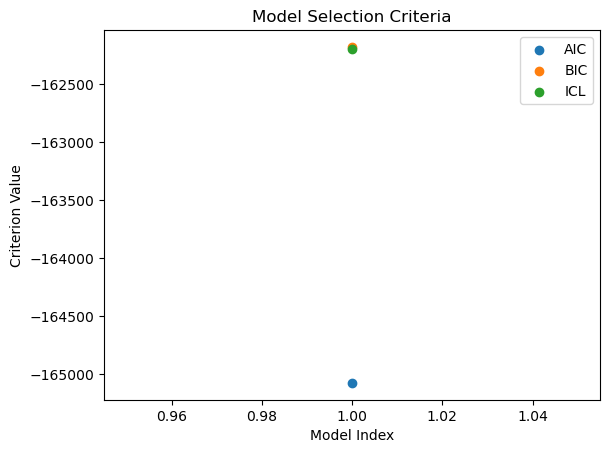

In [201]:
import matplotlib.pyplot as plt

# Assume you have the AIC, BIC, and ICL values
aic_value = -165077.52240845942 # replace with your actual value
bic_value =-162175.88545092382  # replace with your actual value
icl_value = -162190.41770848294  # replace with your actual value

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the values
ax.scatter(1, aic_value, label='AIC')
ax.scatter(1, bic_value, label='BIC')
ax.scatter(1, icl_value, label='ICL')

# Set title and labels
ax.set_title('Model Selection Criteria')
ax.set_xlabel('Model Index')
ax.set_ylabel('Criterion Value')

# Legend
ax.legend()

# Show the plot
plt.show()

In [215]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.feature_selection import mutual_info_classif
from sklearn.impute import SimpleImputer

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.drop(['Age'], axis=1))
imputer = SimpleImputer(strategy='mean')
data_scaled = imputer.fit_transform(data_scaled)

# Select the top 10 features using mutual information
mutual_info = mutual_info_classif(data_scaled, data['Age'])
top_features = mutual_info.argsort()[-10:]

# Apply K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(data_scaled[:, top_features])

# Calculate the silhouette score
silhouette = silhouette_score(data_scaled[:, top_features], clusters)
print(f'Silhouette score: {silhouette:.3f}')

# Create a segment profile
segment_profile = pd.DataFrame({
    'Cluster': clusters,
    'Age': data['Age'],
    'yummy': data['yummy'].mean(),
    'convenient': data['convenient'].mean(),
    'spicy': data['spicy'].mean(),
    #...
})

print(segment_profile.groupby('Cluster').mean())

Silhouette score: 0.268
               Age     yummy  convenient     spicy
Cluster                                           
0        50.470085  0.549266    0.907058  0.095038
1        39.859967  0.549266    0.907058  0.095038
2        47.942623  0.549266    0.907058  0.095038
3        48.435345  0.549266    0.907058  0.095038
4        47.356941  0.549266    0.907058  0.095038


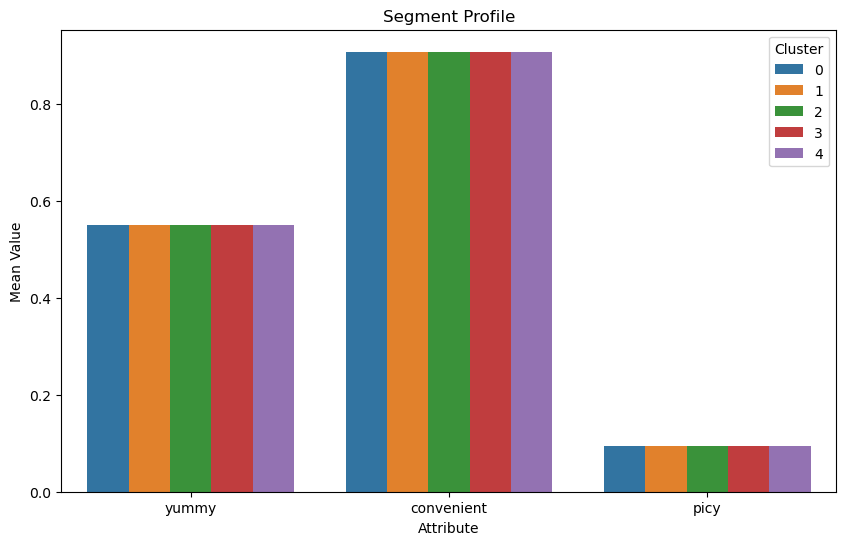

In [218]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a segment profile dataframe
segment_profile = pd.DataFrame({
    'Cluster': clusters,
    'Age': data['Age'],
    'yummy': data['yummy'].mean(),
    'convenient': data['convenient'].mean(),
    'picy': data['spicy'].mean(),
    #...
})

# Melt the dataframe for easier plotting
segment_profile_melted = pd.melt(segment_profile, id_vars=['Cluster'], value_vars=['yummy', 'convenient', 'picy'])

# Create a bar plot for each segment
plt.figure(figsize=(10, 6))
sns.barplot(x='variable', y='value', hue='Cluster', data=segment_profile_melted)
plt.title('Segment Profile')
plt.xlabel('Attribute')
plt.ylabel('Mean Value')
plt.legend(title='Cluster')
plt.show()

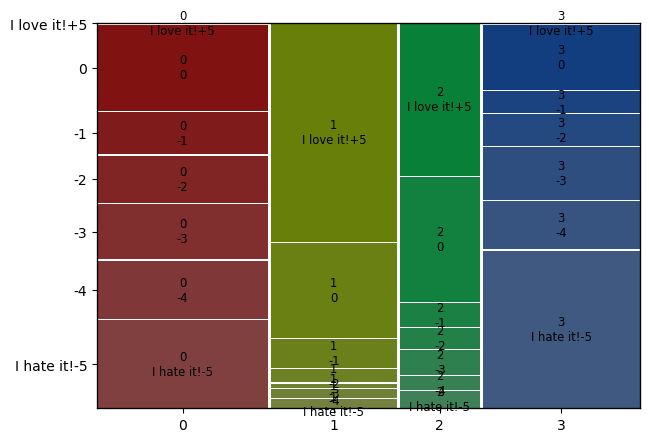

In [230]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic

def labelling(df, x):
    """
    Apply label encoding to the specified variable in the dataframe.
    """
    le = LabelEncoder()
    df[x] = le.fit_transform(df[x])
    return df

vars = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']

for i in vars:
    data = labelling(data, i)

df_new = data.loc[:, vars]

kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(df_new)
data['cluster_num'] = kmeans.labels_

check = pd.crosstab(data['cluster_num'], data['Like'])
check = check[['I hate it!-5','-4','-3','-2','-1','0','I love it!+5']]

plt.rcParams['figure.figsize'] = (7,5)
mosaic(check.stack())
plt.show()

<Figure size 800x600 with 0 Axes>

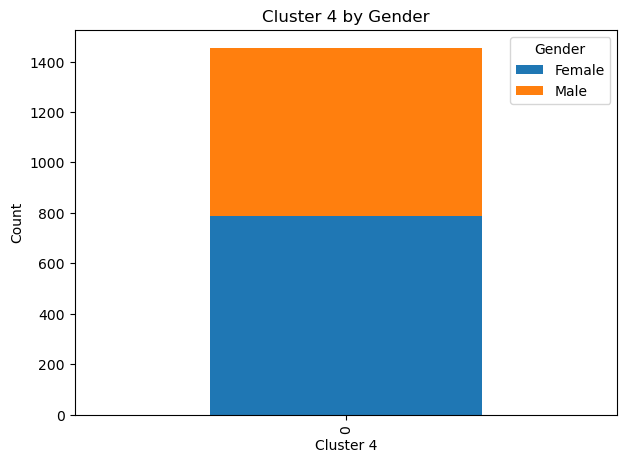

In [240]:
k4 = cluster_assignment[3]

ct = pd.crosstab(k4, data['Gender'])

plt.figure(figsize=(8,6))
ct.plot(kind='bar', stacked=True, title='Cluster 4 by Gender')
plt.xlabel('Cluster 4')
plt.ylabel('Count')
plt.show()

In [241]:
data['VisitFrequency'] = LabelEncoder().fit_transform(data['VisitFrequency'])
visit = data.groupby('cluster_num')['VisitFrequency'].mean()
visit = visit.to_frame().reset_index()
visit

,cluster_num,VisitFrequency
0,0,2.809061
1,1,2.584483
2,2,2.540123
3,3,2.679167


In [242]:
data['Like'] = LabelEncoder().fit_transform(data['Like'])
Like = data.groupby('cluster_num')['Like'].mean()
Like = Like.to_frame().reset_index()
Like

,cluster_num,Like
0,0,5.423948
1,1,3.794828
2,2,3.808642
3,3,6.775000


In [243]:
data['Gender'] = LabelEncoder().fit_transform(data['Gender'])
Gender = data.groupby('cluster_num')['Gender'].mean()
Gender = Gender.to_frame().reset_index()
Gender

,cluster_num,Gender
0,0,0.407767
1,1,0.398276
2,2,0.521605
3,3,0.579167


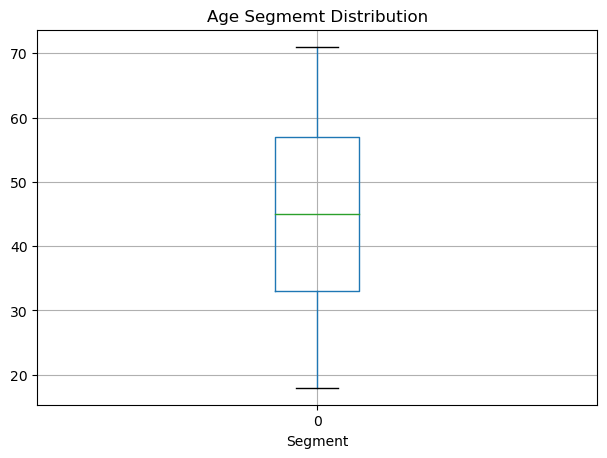

In [250]:
data = pd.DataFrame({'Segment': k4, 'Age': data['Age']})

data.boxplot(by='Segment', column='Age')
plt.title('Age Segmemt Distribution')
plt.suptitle('')
plt.show()
     

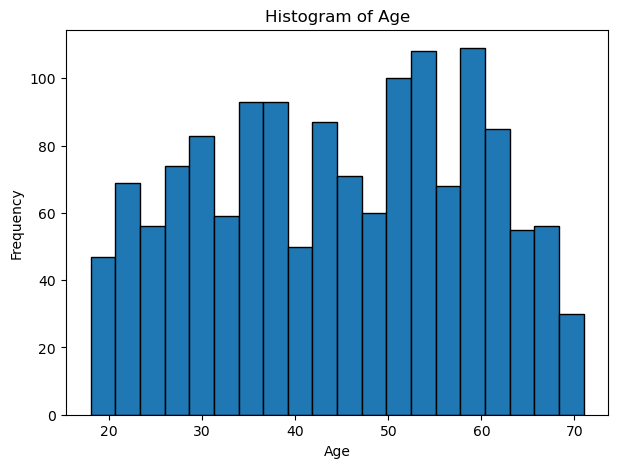

In [252]:
import matplotlib.pyplot as plt

plt.hist(data['Age'], bins=20, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')
plt.show()

In [263]:
from scipy.cluster.hierarchy import linkage
from scipy.spatial.distance import pdist


condensed_dist_matrix = pdist( Data_x, metric='euclidean')

# Perform hierarchical clustering
Z = linkage(condensed_dist_matrix, method='ward')

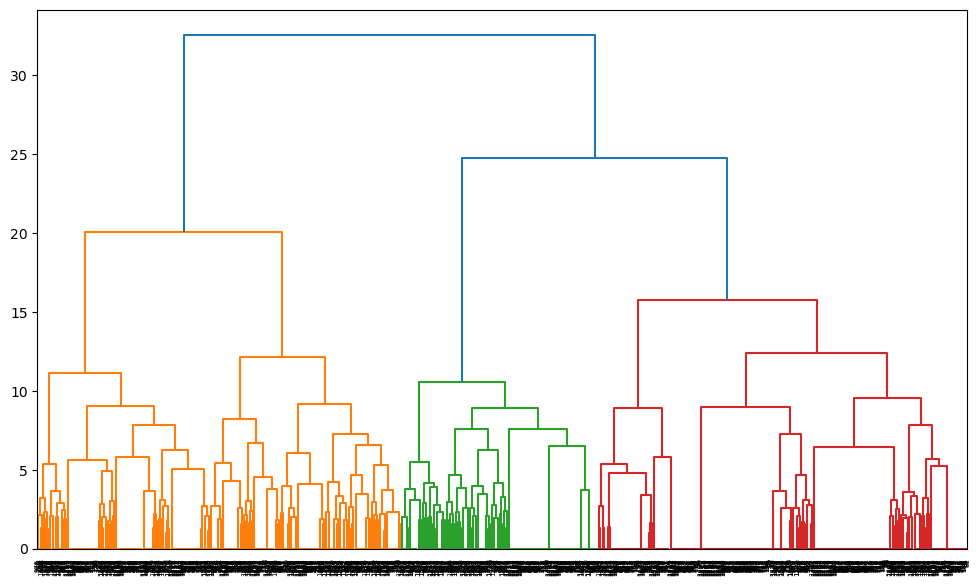

In [264]:
# plot the dendrogram
plt.figure(figsize=(12, 7))
dendrogram(Z)
plt.show()

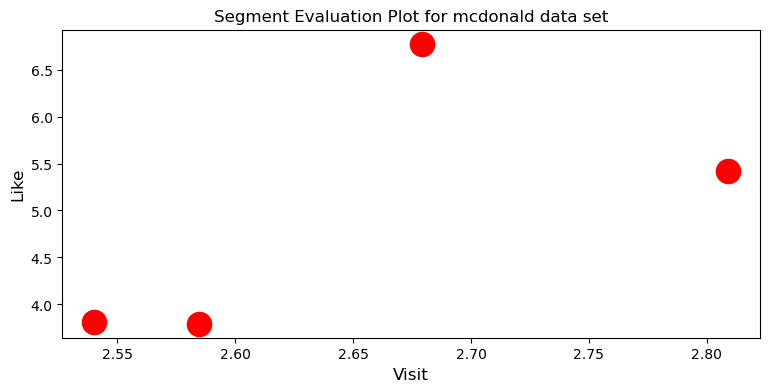

In [266]:
segment = Gender.merge(Like, on='cluster_num', how='left').merge(visit, on='cluster_num', how='left')
segment
plt.figure(figsize = (9,4))
sns.scatterplot(x = "VisitFrequency", y = "Like",data=segment,s=400, color="r")
plt.title("Segment Evaluation Plot for mcdonald data set")
plt.xlabel("Visit", fontsize = 12)
plt.ylabel("Like", fontsize = 12)
plt.show()
     